In [1]:
print("hello world")

hello world


# to create a better regression model we need linearity means if x is increasing y is decreasing this type of relationship should be there

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lets load the Boston House Pricing Dataset

In [3]:
from sklearn.datasets import fetch_openml

bosten = fetch_openml(name="boston", as_frame=True)
df = bosten.frame


c:\Users\ASUS TUFF\Desktop\ML end to end\end_ml\lib\site-packages\sklearn\datasets\_openml.py:328: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
bosten.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
# lets check the description of the dataset
print(bosten.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [7]:
bosten.target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

# Preparing The Dataset

In [8]:
X = pd.DataFrame(bosten.data , columns=bosten.feature_names)
y = pd.DataFrame(bosten.target)
y = y.rename(columns={'MEDV':'Price'})

In [9]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [10]:
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [11]:
# Summarizing the Stats of the data

df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
# Missing Values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Exploratory Data Analysis

In [13]:
# Corelation Matrix
# corelation means 2 colmns are related to each other eg(if 2 colmns shows height in feet and height in cm) both shows same thing so they are corelated remove 1 colmns 
# in regression model it is very important to know the corelation between the features
# because if two features are highly corelated then we can drop one feature among them
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


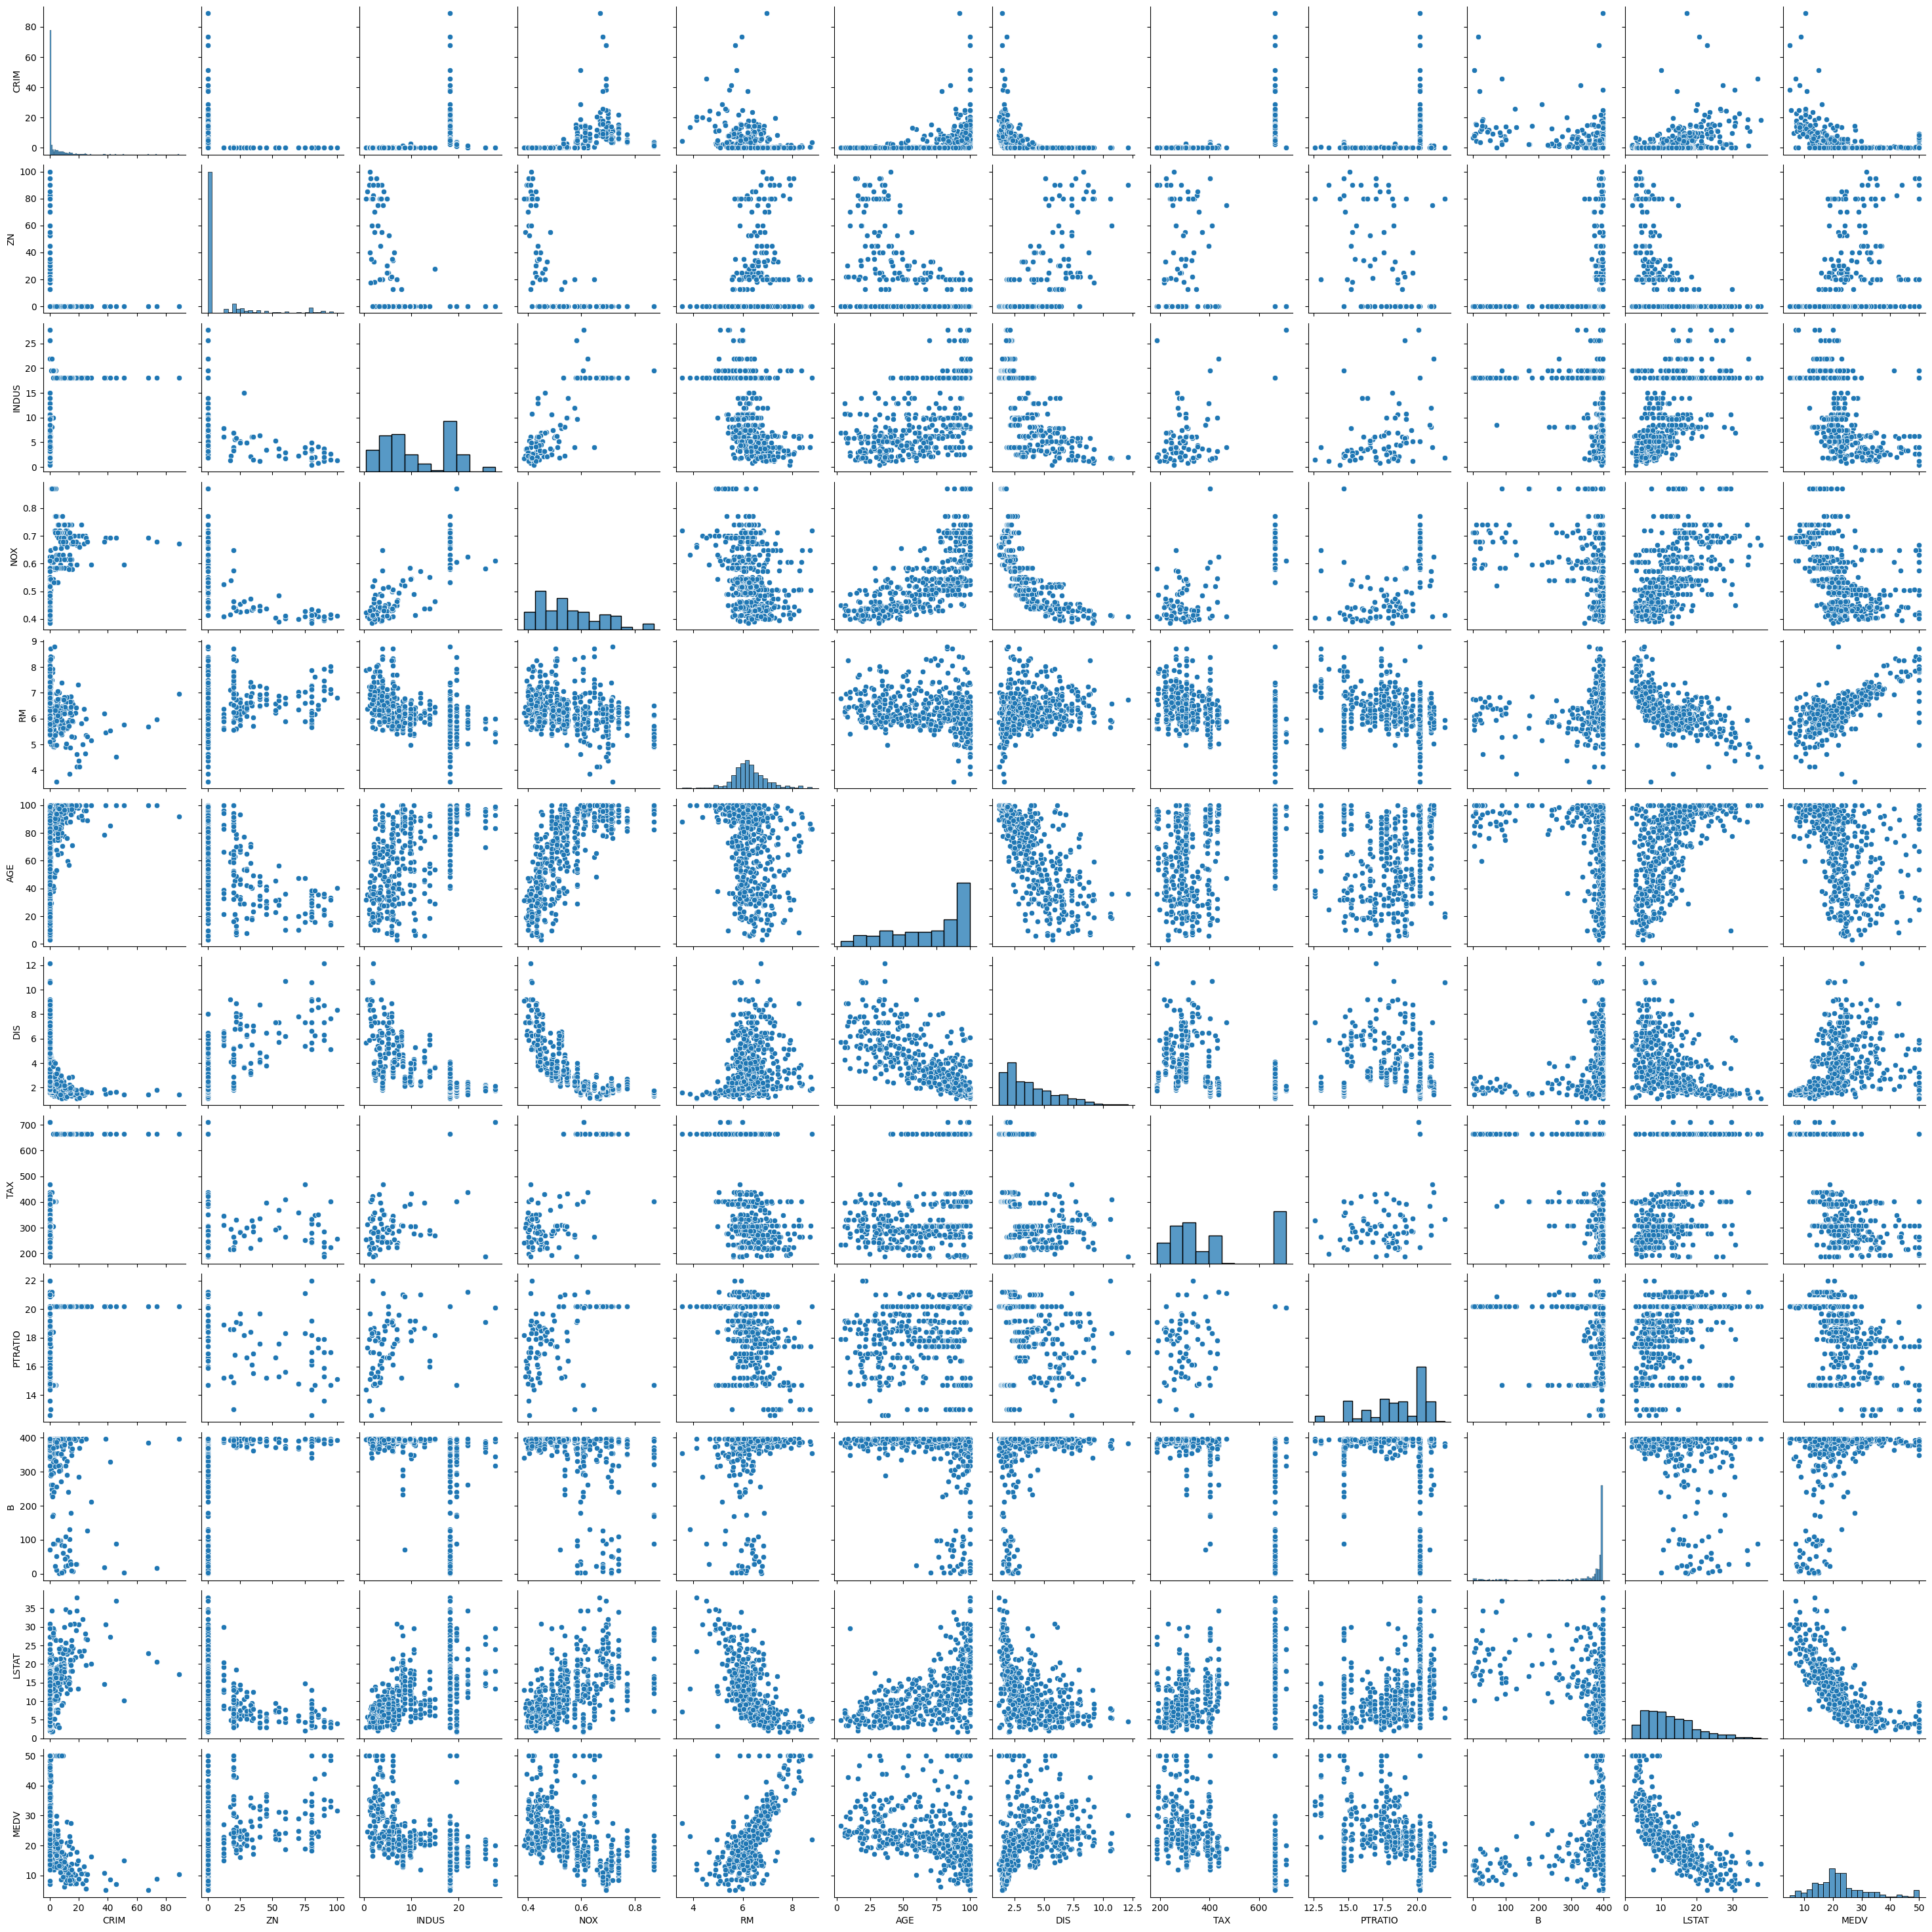

In [89]:
sns.pairplot(df)

In [14]:
df = df.rename(columns={'MEDV':'Price'})
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Text(0.5, 1.0, 'Crime Rate vs Price')

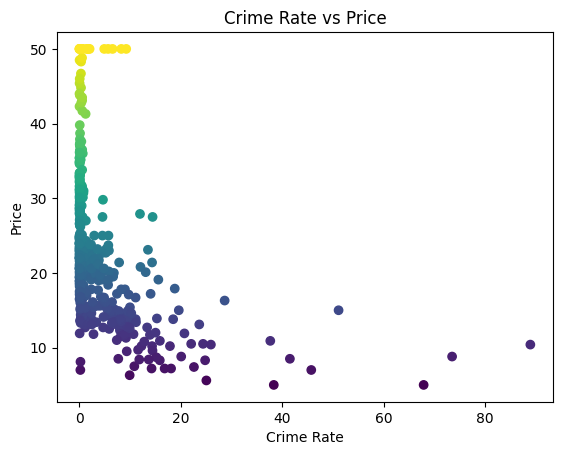

In [15]:
plt.scatter(df['CRIM'], df['Price'] , c=df['Price'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')
plt.title('Crime Rate vs Price')

Text(0.5, 1.0, 'Average Number of Rooms vs Price')

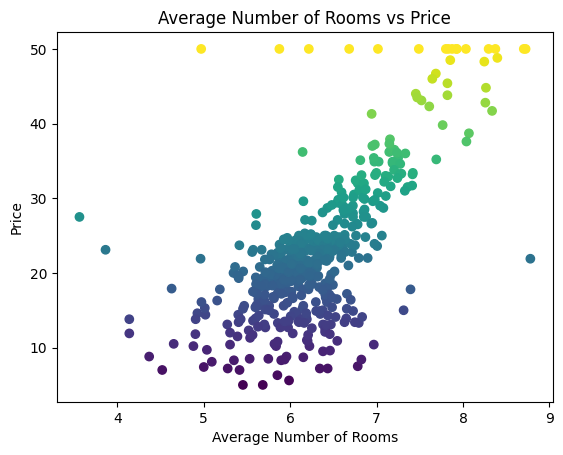

In [16]:
plt.scatter(df['RM'], df['Price'] , c=df['Price'])
plt.xlabel('Average Number of Rooms')
plt.ylabel('Price')
plt.title('Average Number of Rooms vs Price')

<Axes: xlabel='RM', ylabel='Price'>

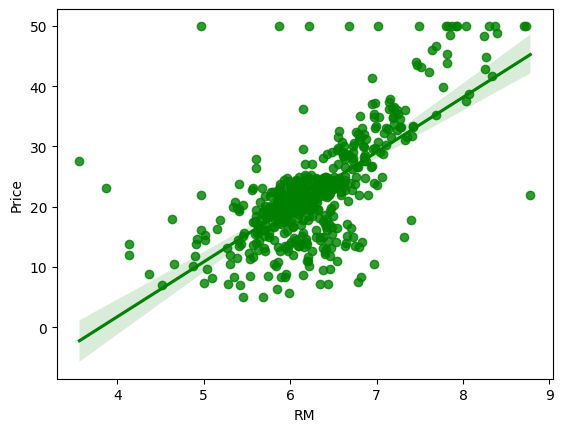

In [17]:
# RM means average number of rooms 
sns.regplot(x='RM', y='Price', data=df , color='green')

<Axes: xlabel='LSTAT', ylabel='Price'>

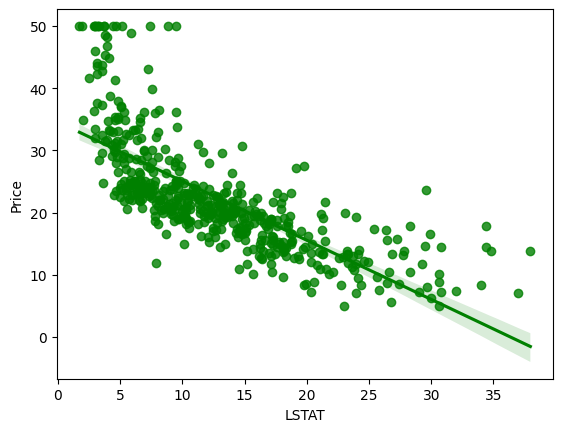

In [18]:
# LSTAT means % of lower status of the population 
# negative corelation with price means as LSTAT increases Price decreases
sns.regplot(x='LSTAT', y='Price', data=df , color='green')

<Axes: xlabel='PTRATIO', ylabel='Price'>

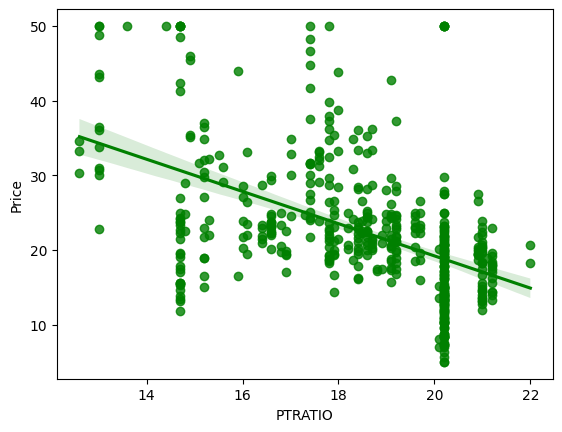

In [19]:
# same as corelation is negative between PTRATIO and Price
# PTRATIO means pupil-teacher ratio by town
# as PTRATIO increases Price decreases
sns.regplot(x='PTRATIO', y='Price', data=df , color='green')

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(404, 102, 404, 102)

In [21]:
# all the data points are not in same scale so we have to scale them first then apply linear regression model


# fit means calculate the mean and standard deviation for scaling
# fit_transform means fit the scaler and then transform the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train) # means adn standard deviation is calculated from X_train and lerarns the patterns
X_test_scaled = scalar.transform(X_test) # here we just transform the data no mean and std is calculated because this will helps to learn the patterns easly

# Model Training

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train_scaled , y_train)
lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


How to read it coefficient

✔ Positive number

Feature increases → target increases

✔ Negative number

Feature increases → target decreases

✔ Bigger number

Model thinks that feature is more important

✔ Small number (near zero)

Feature is not important

In [23]:
## print the coefficients of the model
lr.coef_  # lr.coef_ tells how strongly each feature pushes the prediction up or down.

array([[-1.00213533,  0.69626862,  0.27806485,  0.7187384 , -2.0223194 ,
         3.14523956, -0.17604788, -3.0819076 ,  2.25140666, -1.76701378,
        -2.03775151,  1.12956831, -3.61165842]])

In [25]:
# predicting the prices for test data
y_pred = lr.predict(X_test_scaled)
y_pred

array([[28.99672362],
       [36.02556534],
       [14.81694405],
       [25.03197915],
       [18.76987992],
       [23.25442929],
       [17.66253818],
       [14.34119   ],
       [23.01320703],
       [20.63245597],
       [24.90850512],
       [18.63883645],
       [-6.08842184],
       [21.75834668],
       [19.23922576],
       [26.19319733],
       [20.64773313],
       [ 5.79472718],
       [40.50033966],
       [17.61289074],
       [27.24909479],
       [30.06625441],
       [11.34179277],
       [24.16077616],
       [17.86058499],
       [15.83609765],
       [22.78148106],
       [14.57704449],
       [22.43626052],
       [19.19631835],
       [22.43383455],
       [25.21979081],
       [25.93909562],
       [17.70162434],
       [16.76911711],
       [16.95125411],
       [31.23340153],
       [20.13246729],
       [23.76579011],
       [24.6322925 ],
       [13.94204955],
       [32.25576301],
       [42.67251161],
       [17.32745046],
       [27.27618614],
       [16

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

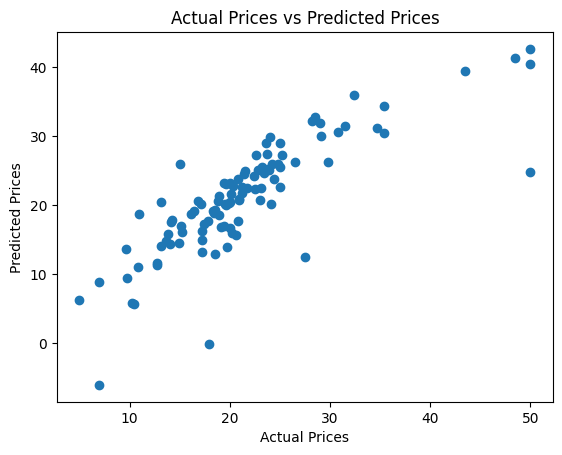

In [26]:
# plot a scatter plot between y_test and y_pred
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')

In [27]:
# means error in prediction or residuals
residuals = y_test - y_pred
residuals

,Price
173,-5.396724
274,-3.625565
491,-1.216944
72,-2.231979
452,-2.669880
...,...
412,18.064237
436,-4.084867
411,1.016403
86,0.223780


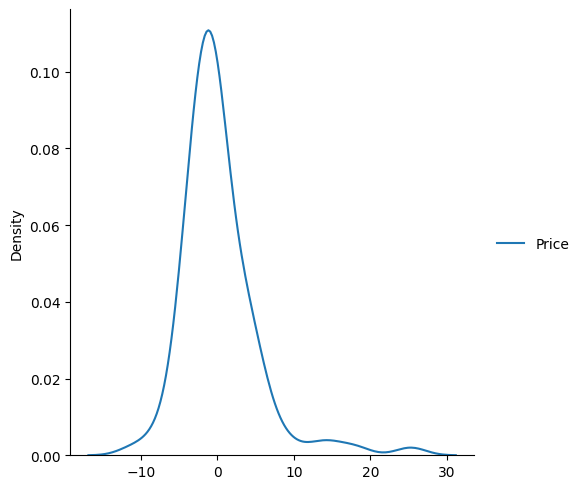

In [28]:
# we got a normal distribution of residuals means our model is good
sns.displot(residuals , kind='kde')

MAE, MSE, RMSE → How far off predictions are (error magnitude)

R² → How well model captures patterns in data (goodness of fit)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 3.1890919658878483
Mean Squared Error: 24.291119474973517
Root Mean Squared Error: 4.928602182665336


# R Square and Adjusted R Square

The Adjusted R^2 will be less than R^2 always

formula

R^2 = 1 - SSR / SST
R^2 = Coefficient of determination SSR = sum of square of residuals SST = total sum of square

R² → How well model captures patterns in data (goodness of fit)

In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')  # Coefficient of determination
# the model learns about 76% of the patterns in the data

R^2 Score: 0.668759493535632


Adjusted R^2 = 1 - [(1-R2)*(n-1)/(n-k-1)]

where:
R^2: The R^2 of the model n: The number of observations k: The number of predictor variables

it simply means i will not take useless colmns and gives an honest reviws that i learned this much

In [31]:
# display adjusted R^2 score

adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjusted_r2



0.6198262368988503

# New Data Prediction

1st step:
we need the data in 1 row and 13 colmns

2nd step:
we need to scale them or use standard scale

In [32]:
test = X_train.iloc[0 , :]
print(test.shape)
test = test.values.reshape(1, -1) # 1 row and -1 means calculate the number of columns automatically
print(test.shape)

(13,)
(1, 13)


In [33]:
scaled_test = scalar.transform(test)
scaled_test

c:\Users\ASUS TUFF\Desktop\ML end to end\end_ml\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.28770177, -0.50032012,  1.03323679, -0.27808871,  0.48925206,
        -1.42806858,  1.02801516, -0.80217296,  1.70689143,  1.57843444,
         0.84534281, -0.07433689,  1.75350503]])

In [39]:
new_price_pred = lr.predict(scaled_test)
new_price_pred

array([[10.96952405]])

# Saving the model file for Deployment

In [44]:
import pickle
# save the model to a file

pickle.dump(lr, open('model.pkl', 'wb'))
# load the model from a file

# how to load this pickle model

In [45]:
pickle_model = pickle.load(open('model.pkl', 'rb'))

In [46]:
pickle_model.predict(scaled_test)

array([[10.96952405]])

In [38]:
import pickle

pickle.dump(scalar, open('scaler.pkl', 'wb'))
# load the scaler from a file